In [ ]:
import tensorflow as tf #librería para trabajar con ML y DL
import numpy as np # Cálculo numérico
import matplotlib.pyplot as plt
from tensorflow import keras # API de alto nivel para trabajar con NN
from tensorflow.keras.models import Sequential # El modelo más sencillo de las NN
from tensorflow.keras.layers import Dense, Flatten # La capa más básica de las NN
from tensorflow.keras.datasets import mnist # Para cargar la base de datos
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import losses # Cargamos todas las formas de calcular la pérdida (error)

from IPython.display import clear_output # Para las gráficas de entrenamiento

In [ ]:
plt.rcParams['figure.figsize'] = (8,8)

In [ ]:
### Cargamos la base de datos desde la web
### Esto puede tardar dependiendo el ancho de banda

(xtrain, ytrain), (xval, yval) = mnist.load_data() # Asignamos a las variables los datos de mnist

# Conversión de datos
xtrain = xtrain.astype('float32') / 255 # Normalizamos las entradas
ytrain = to_categorical(ytrain) # Convertimos las salidas a variables categóricas

xval = xval.astype('float32') / 255
yval = to_categorical(yval)

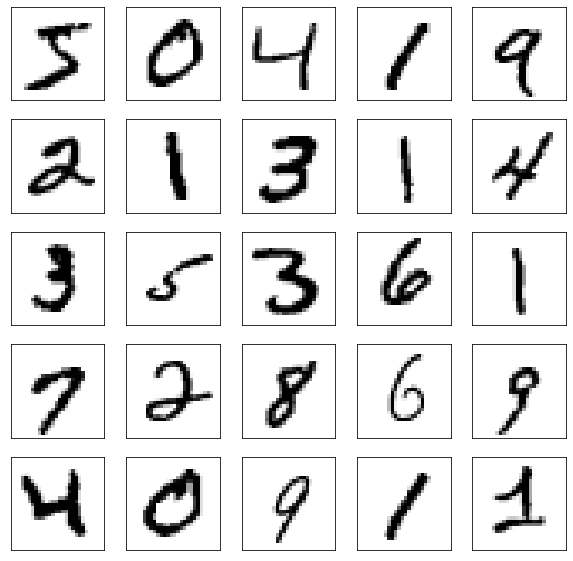

In [ ]:
# Vamos a graficar las primeras 25 imágenes de la base

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(xtrain[i], cmap=plt.cm.binary)
plt.show()

Los datos que vamos a usar para este caso serán imágenes.

Por ahora no entraremos en tantos detalles, solo recordar que una imagen a escala de grises es un vector de $n*m$ dimensiones

In [ ]:
# Arquitectura del modelo

model = Sequential()
model.add(Flatten(input_shape=(28,28))) # capa de entrada
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10,activation='softmax')) # capa de salida

La linea de código 4 contiene un comando nuevo, *Flatten*. Este comando permite 'aplanar' las dimensiones de un vector.

Como lo comentamos, una imagen se considera como una matriz de datos. Sin embargo, una red no puede procesar la matriz, sino que procesa vectores de la forma $1*n$. Entonces, el comando *Flatten* cambiara las dimensiones de la matriz $n*m$ a la forma $1*(n*m)$.

Ya que definimos la arquitectura, vamos a construir el modelo

In [ ]:
model.compile(optimizer='SGD',
              loss = losses.BinaryCrossentropy(),
              metrics=['accuracy'])

model.summary() # Mostrar un resumen del modelo

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_6 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_7 (Dense)              (None, 10)                330       
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________


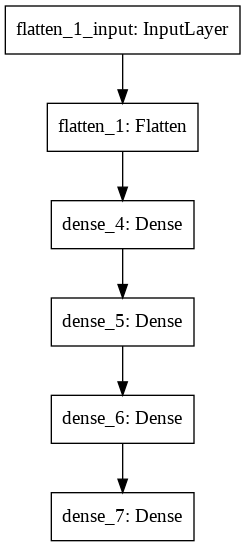

In [ ]:
tf.keras.utils.plot_model(model,show_layer_names=True)

Ya que construimos el modelo y que no marcó error podemos realizar la etapa de entrenamiento.

In [ ]:
### Para graficar "en vivo" los parámetros

class PlotLosses(keras.callbacks.Callback):
  def on_train_begin(self, logs={}):
    self.i = 0
    self.x = []
    self.losses = []
    self.val_losses = []
    self.accuracy = []
    self.val_acc = []

    self.fig = plt.figure()

    self.logs = []

  def on_epoch_end(self, epoch, logs={}):
    self.logs.append(logs)
    self.x.append(self.i)
    self.accuracy.append(logs.get('accuracy'))
    self.val_acc.append(logs.get('val_accuracy'))
    self.losses.append(logs.get('loss'))
    self.val_losses.append(logs.get('val_loss'))
    self.i +=1

    clear_output(wait=True)
    plt.plot(self.x, self.accuracy, label='Accuracy')
    plt.plot(self.x, self.val_acc, label='Validation Accuracy')
    plt.plot(self.x, self.losses, label='Loss')
    plt.plot(self.x, self.val_losses, label="Validation Loss")
    plt.legend()
    plt.show();

plot_losses = PlotLosses()

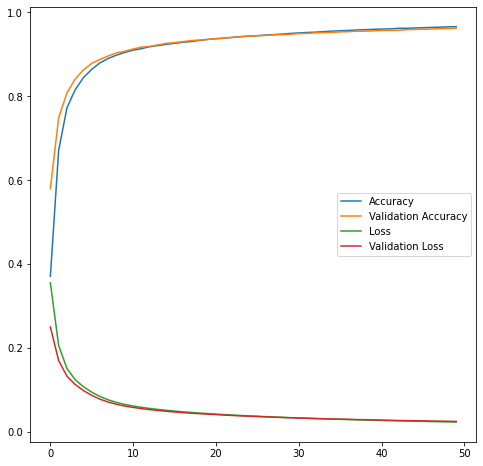

In [ ]:
### Entrenamiento para alcanzar el modo Sabio

model.fit(xtrain, ytrain,
          epochs = 50,
          validation_data = (xval, yval),
          callbacks = [plot_losses],
          verbose = 2) # Como visualizaremos en vivo el desempeño del modelo ponemos el valor en 0,

Evaluar el modelo

Usando los comandos *evaluate()* vamos a conocer el desempeño que obtuvo el modelo después de 100 épocas.

In [ ]:
# Evaluación del desempeño

_, train_acc = model.evaluate(xtrain, ytrain, verbose=0)
_, test_acc = model.evaluate(xval, yval, verbose=0)

print('Accuracy en el set de entrenamiento: %.3f' % (train_acc* 100))
print('Accuracy en el set de prueba: %.3f' % (test_acc * 100))

Accuracy en el set de entrenamiento: 96.657
Accuracy en el set de prueba: 96.230


Predicciones ante nuevos datos

In [ ]:
new_image = # cargar la imagen
new_image = # convertir a escala de grises
new_image = # redimensionar imagen
new_image = # normalizar imagen

model.predict(new_image)